In [1]:
import numpy as np
import matplotlib.pyplot as plt

Initial value of the plasma parameters :
* $\rho_0$ the upstream charge density : `n0`
* $B_0$ the upstream modulus of the magnetic field : `B0`
* $\beta_0$ the upstream plasma parameter : `beta0`
* $\Theta_0$ the angle between the upstream magnetic field and the normal to the shock : `theta0`

In [2]:
n0 = 1.0
B0 = 1.0
beta0 = 0.8
theta0 = 30*np.pi/180.0

We use `n` and `T` index notation for normal and tangential, respectively. Following the definition of `theta`

In [3]:
B0_n = np.cos(theta0)
B0_T = np.sin(theta0)

From the definition of the $\beta$ parameter :

In [4]:
p0 = 0.5*beta0*B0**2

We then have as unknown : `n0`, `n1`, `v0_n`, `v0_T`, `v1_n`, `v1_T`, `p0`, `p1`, `B0_n` `B0_T`, `B1_n`, `B1_T`, that is 12 unknowns.
We already know as parameter or initial range of values : `n0`, `v0_n`, `p0`, `B0_n` and `B0_T`, that is 5 unknowns.

We then need 7 equations from the RH jump equations :

**Maxwell-Thomson** : 1 equation

In [6]:
# B0_n-B1_n = 0

**Maxwell-Faraday** (tangential) : 1 equation

In [7]:
# v0_n*B0_T-B0_n*v0_T-(v1_n*B1_T-B1_n*v1_T) = 0

**de Hoffmann-Teller frame** : 1 equation

In [8]:
# v0_n*B0_T-B0_n*v0_T = 0
# the second equation (just below) is then the same as given by Maxwell-Faraday
# v1_n*B1_T-B1_n*v1_T = 0

**Mass conservation** : 1 equation

In [9]:
# n0*v0_n-n1*v1_n = 0

**Momentum conservation** : 2 equations

In [10]:
# n0*v0_n**2+p0+0.5*(B0_T**2-B0_n**2)-(n1*v1_n**2+p1+0.5*(B1_T**2-B1_n**2)) = 0
# n0*v0_n*v0_T-B0_n*B0_T-(n1*v1_n*v1_T-B1_n*B1_T) = 0

**Energy conservation** : 1 equation

In [11]:
# 0.5*n0*(v0_n**2+v0_T**2)*v0_n+2.5*p0*v0_n-B0_T*(B0_n*v0_T-B0_T*v0_n)-(0.5*n1*(v1_n**2+v1_T**2)*v1_n+2.5*p1*v1_n-B1_T*(B1_n*v1_T-B1_T*v1_n)) = 0

Using the Maxwell-Faraday and the HT frame, energy conservation can be simplified as

In [12]:
# v0_n**2+v0_T**2+5*p0/n0-(v1_n**2+v1_T**2+5*p1/n1) = 0

We then define the cost function which depends on the 7 components vectors :
`x = (n1, v0_T, v1_n, v1_T, p1, B1_n, B1_T)`
with the `args` vector defined as `args = (n0,  v0_n, p0, B0_n, B0_T)`

In [13]:
def cost(x, *args):
    n1, v0_T, v1_n, v1_T, p1, B1_n, B1_T = x
    n0, v0_n, p0, B0_n, B0_T = args
    
    return [B0_n-B1_n,
            v0_n*B0_T-B0_n*v0_T,
            v1_n*B1_T-B1_n*v1_T,
            n0*v0_n-n1*v1_n,
            n0*v0_n**2+p0+0.5*(B0_T**2-B0_n**2)-(n1*v1_n**2+p1+0.5*(B1_T**2-B1_n**2)),
            n0*v0_n*v0_T-B0_n*B0_T-(n1*v1_n*v1_T-B1_n*B1_T),
            v0_n**2+v0_T**2+5*p0/n0-(v1_n**2+v1_T**2+5*p1/n1)
           ]

In [ ]:
def tune(x, *args):
    n1, v0_n, v0_T, v1_T, p1, B1_n, B1_T = x
    n0, v1_n, p0, B0_n, B0_T = args
    
    return [B0_n-B1_n,
            v0_n*B0_T-B0_n*v0_T,
            v1_n*B1_T-B1_n*v1_T,
            n0*v0_n-n1*v1_n,
            n0*v0_n**2+p0+0.5*(B0_T**2-B0_n**2)-(n1*v1_n**2+p1+0.5*(B1_T**2-B1_n**2)),
            n0*v0_n*v0_T-B0_n*B0_T-(n1*v1_n*v1_T-B1_n*B1_T),
            v0_n**2+v0_T**2+5*p0/n0-(v1_n**2+v1_T**2+5*p1/n1)
           ]

In [14]:
gamma = 5./3.

# ___ magnetic field :
B0 = np.sqrt(B0_n**2+B0_T**2)

# ___ intermediate velocity :
v0_i = B0_n/np.sqrt(n0)

# ___ Alfven velocity :
v0_A = B0/np.sqrt(n0)

# ___ sound speed :
c0_s = np.sqrt(gamma*p0/n0)

# ___ slow mode :
v0_s = np.sqrt(0.5*(v0_A**2+c0_s**2-np.sqrt((v0_A**2+c0_s**2)**2-4.0*v0_A**2*c0_s**2*(np.cos(theta0))**2)))

# ___ fast mode :
v0_f = np.sqrt(0.5*(v0_A**2+c0_s**2+np.sqrt((v0_A**2+c0_s**2)**2-4.0*v0_A**2*c0_s**2*(np.cos(theta0))**2)))

In [15]:
print("upstream sound speed            : %5.2f" % c0_s)
print("upstream Alfven velocity        : %5.2f" % v0_A)
print("upstream intermediate velocity  : %5.2f" % v0_i)
print("upstream slow velocity          : %5.2f" % v0_s)
print("upstream fast velocity          : %5.2f" % v0_f)

upstream sound speed            :  0.82
upstream Alfven velocity        :  1.00
upstream intermediate velocity  :  0.87
upstream slow velocity          :  0.63
upstream fast velocity          :  1.13


In [16]:
from scipy.optimize import least_squares

**Non-physical** branch : normal velocity is increasing through the shock

In [17]:
v0_n_span_A = np.linspace(0.3, v0_s, 100)
v1_n_span_A = np.zeros_like(v0_n_span_A)

#       n1,  v0_T,  v1_n,  v1_T,    p1,  B1_n,  B1_T
x0 = (1.01,  0.37,  1.62,  0.35,  0.41,  0.87,  0.49)

for i, v0_n in enumerate(v0_n_span_A):
    args=(n0, v0_n, p0, B0_n, B0_T)
    sol = least_squares(cost, x0, args=args, bounds=([0, np.inf]), method='trf')
    n1, v0_T, v1_n, v1_T, p1, B1_n, B1_T = sol.x
    v1_n_span_A[i] = v1_n
    x0 = sol.x

In [47]:
v0_n_span_B = np.linspace(0.635, v0_i, 100)

v1_n_span_B = np.zeros_like(v0_n_span_B)

#       n1,  v0_T,  v1_n,  v1_T,    p1,  B1_n,  B1_T
x0 = (1.00,  0.37,  0.63,  0.36,  0.41,  0.87,  0.49)

for i, v0_n in enumerate(v0_n_span_B):
    args=(n0, v0_n, p0, B0_n, B0_T)
    sol = least_squares(cost, x0, args=args, bounds=([0, np.inf]), method='trf')
    n1, v0_T, v1_n, v1_T, p1, B1_n, B1_T = sol.x
    v1_n_span_B[i] = v1_n
    x0 = sol.x

In [48]:
v0_n_span_C = np.linspace(1.12, 0.64, 100)
v1_n_span_C = np.zeros_like(v0_n_span_C)

#       n1,  v0_T,  v1_n,  v1_T,    p1,  B1_n,  B1_T
x0 = (1.00,  0.65,  2.13,  0.65,  0.40,  0.87,  0.50)

for i, v0_n in enumerate(v0_n_span_C):
    args=(n0, v0_n, p0, B0_n, B0_T)
    sol = least_squares(cost, x0, args=args, bounds=([0, np.inf]), method='trf')
    n1, v0_T, v1_n, v1_T, p1, B1_n, B1_T = sol.x
    v1_n_span_C[i] = v1_n
    x0 = sol.x
    # print(x0)

In [49]:
v0_n_span_D = np.linspace(1.14, 1.5, 100)
v1_n_span_D = np.zeros_like(v0_n_span_D)

#       n1,  v0_T,  v1_n,  v1_T,    p1,  B1_n,  B1_T
x0 = (1.00,  0.65,  1.13,  0.65,  0.40,  0.87,  0.50)

for i, v0_n in enumerate(v0_n_span_D):
    args=(n0, v0_n, p0, B0_n, B0_T)
    sol = least_squares(cost, x0, args=args, bounds=([0, np.inf]), method='trf')
    n1, v0_T, v1_n, v1_T, p1, B1_n, B1_T = sol.x
    v1_n_span_D[i] = v1_n
    x0 = sol.x
    # print(x0)

In [50]:
v0_n_span_E = np.linspace(0.64, 0.90, 100)
v1_n_span_E = np.zeros_like(v0_n_span_E)

# [0.98919234 0.6466323  1.13223683 0.63640523 0.39282045 0.8660254 0.48677369]
#       n1,  v0_T,  v1_n,  v1_T,    p1,  B1_n,  B1_T
x0 = (0.99,  0.65,  1.13,  0.64,  0.39,  0.87,  0.49)
x0 = (0.10,  0.65,  3.13,  0.64,  0.39,  0.87,  0.49)

for i, v0_n in enumerate(v0_n_span_E):
    args=(n0, v0_n, p0, B0_n, B0_T)
    sol = least_squares(cost, x0, args=args, bounds=([0, np.inf]), method='trf')
    n1, v0_T, v1_n, v1_T, p1, B1_n, B1_T = sol.x
    v1_n_span_E[i] = v1_n
    x0 = sol.x
    # print(x0)

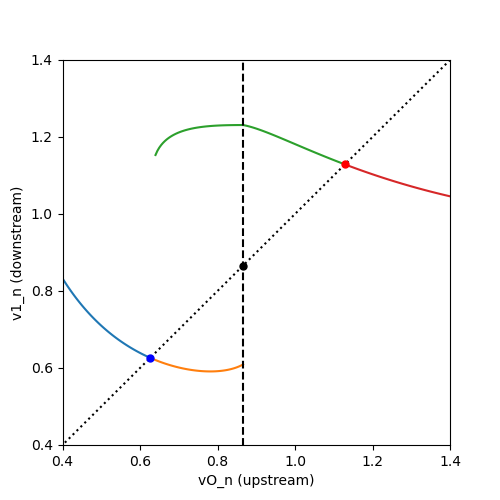

In [53]:
%matplotlib widget

fig, ax = plt.subplots(figsize=(5, 5))
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.plot([0, 2], [0, 2], color='k', linestyle=':')
ax.plot(v0_n_span_A, v1_n_span_A, color=cycle[0])
ax.plot(v0_n_span_B, v1_n_span_B, color=cycle[1])
ax.plot(v0_n_span_C, v1_n_span_C, color=cycle[2])
ax.plot(v0_n_span_D, v1_n_span_D, color=cycle[3])

# ax.plot(v0_n_span_E, v1_n_span_E, color=cycle[4])

ax.plot([v0_i, v0_i], [0, 2], color='k', linestyle='--')

ax.plot([v0_s], [v0_s], color='b', marker = "o", markersize=5)
ax.plot([v0_i], [v0_i], color='k', marker = "o", markersize=5)
ax.plot([v0_f], [v0_f], color='r', marker = "o", markersize=5)

ax.set_xlim([0.4, 1.4])
ax.set_ylim([0.4, 1.4])
ax.set_xlabel("vO_n (upstream)")
ax.set_ylabel("v1_n (downstream)")

plt.savefig("shock.pdf", dpi=300)

In [ ]:
plt.clf()

In [ ]:
v0_n_span_B = np.linspace(0.635, v0_i, 100)
v1_n_span_B = np.zeros_like(v0_n_span_B)

#       n1,  v0_T,  v1_n,  v1_T,    p1,  B1_n,  B1_T
x0 = (1.00,  0.37,  0.63,  0.36,  0.41,  0.87,  0.49)

for i, v0_n in enumerate(v0_n_span_B):
    args=(n0, v0_n, p0, B0_n, B0_T)
    sol = least_squares(cost, x0, args=args, bounds=([0, np.inf]), method='trf')
    n1, v0_T, v1_n, v1_T, p1, B1_n, B1_T = sol.x
    v1_n_span_B[i] = v1_n
    x0 = sol.x
    # print(x0)

In [ ]:
v0_n_span_C = np.linspace(0.78, v0_f, 100)
v1_n_span_C = np.zeros_like(v0_n_span_C)

#       n1,  v0_T,  v1_n,  v1_T,    p1,  B1_n,  B1_T
x0 = (0.83,  0.49,  0.93,  0.00,  0.39,  0.87,  0.03)

for i, v0_n in enumerate(v0_n_span_C):
    args=(n0, v0_n, p0, B0_n, B0_T)
    sol = least_squares(cost, x0, args=args, bounds=([0, np.inf]), method='trf')
    n1, v0_T, v1_n, v1_T, p1, B1_n, B1_T = sol.x
    v1_n_span_C[i] = v1_n
    x0 = sol.x
    # print(x0)

In [ ]:
# [2.00287465 1.01036297 0.87374415 1.49740335 0.95705982 0.8660254 1.48417514]

In [ ]:
v0_n_span_D = np.linspace(1.75, 0.78, 100)
v1_n_span_D = np.zeros_like(v0_n_span_D)

#       n1,  v0_T,  v1_n,  v1_T,    p1,  B1_n,  B1_T
x0 = (2.00,  1.01,  0.87,  1.50,  0.96,  0.87,  1.48)

for i, v0_n in enumerate(v0_n_span_D):
    args=(n0, v0_n, p0, B0_n, B0_T)
    sol = least_squares(cost, x0, args=args, bounds=([0, np.inf]), method='trf')
    n1, v0_T, v1_n, v1_T, p1, B1_n, B1_T = sol.x
    v1_n_span_D[i] = v1_n
    x0 = sol.x
    # print(x0)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

ax.plot([0, 2], [0, 2], color='k', linestyle=':')
ax.plot(v0_n_span_A, v1_n_span_A, color=cycle[0])
ax.plot(v0_n_span_B, v1_n_span_B, color=cycle[1])
ax.plot(v0_n_span_C, v1_n_span_C, color=cycle[2])

ax.plot([v0_s], [v0_s], color='b', marker = "o", markersize=5)
ax.plot([v0_i], [v0_i], color='k', marker = "o", markersize=5)
ax.plot([v0_f], [v0_f], color='r', marker = "o", markersize=5)

ax.set_xlim([0.2, 1.6])
ax.set_ylim([0.2, 1.4])
ax.set_xlabel("vO_n (upstream)")
ax.set_ylabel("v1_n (downstream)")

In [ ]:
plt.clf()

# First attempt, not the best

In [ ]:
from scipy.optimize import fsolve

In [ ]:
v0_n = v0_n_span[0]

# x0 = (0.1, 0.0, 2.0, 0.5, 0.8, 0.1, 0.5)
#      n1, v0_T, v1_n, v1_T,   p1, B1_n, B1_T
x0 = (0.01,  0.03,  5.1,  4.4,  0.0,  0.9,  0.8)

args=(n0, v0_n, p0, B0_n, B0_T)

In [ ]:
root = fsolve(cost, x0, args=args)

In [ ]:
cost(root, *args)

In [ ]:
n1, v0_T, v1_n, v1_T, p1, B1_n, B1_T = root

theta1 = np.arctan2(B1_T, B1_n)

In [ ]:
gamma = 5./3.

# ___ magnetic field :
B0 = np.sqrt(B0_n**2+B0_T**2)
B1 = np.sqrt(B1_n**2+B1_T**2)

# ___ intermediate velocity :
v0_i = B0_n/np.sqrt(n0)
v1_i = B1_n/np.sqrt(n1)

# ___ Alfven velocity :
v0_A = B0/np.sqrt(n0)
v1_A = B1/np.sqrt(n1)

# ___ sound speed :
c0_s = np.sqrt(gamma*p0/n0)
c1_s = np.sqrt(gamma*p1/n1)

# ___ slow mode :
v0_s = np.sqrt(0.5*(v0_A**2+c0_s**2-np.sqrt((v0_A**2+c0_s**2)**2-4.0*v0_A**2*c0_s**2*(np.cos(theta0))**2)))
v1_s = np.sqrt(0.5*(v1_A**2+c1_s**2-np.sqrt((v1_A**2+c1_s**2)**2-4.0*v1_A**2*c1_s**2*(np.cos(theta1))**2)))

# ___ fast mode :
v0_f = np.sqrt(0.5*(v0_A**2+c0_s**2+np.sqrt((v0_A**2+c0_s**2)**2-4.0*v0_A**2*c0_s**2*(np.cos(theta0))**2)))
v1_f = np.sqrt(0.5*(v1_A**2+c1_s**2+np.sqrt((v1_A**2+c1_s**2)**2-4.0*v1_A**2*c1_s**2*(np.cos(theta1))**2)))

In [ ]:
print("density  : %5.2f   ---  %5.2f" % (n0, n1))
print("U normal : %5.2f   ---  %5.2f" % (v0_n, v1_n))
print("U tang   : %5.2f   ---  %5.2f" % (v0_T, v1_T))
print("pressure : %5.2f   ---  %5.2f" % (p0, p1))
print("B normal : %5.2f   ---  %5.2f" % (B0_n, B1_n))
print("B tang   : %5.2f   ---  %5.2f" % (B0_T, B1_T))

In [ ]:
print("upstream sound speed            : %5.2f" % c0_s)
print("upstream Alfven velocity        : %5.2f" % v0_A)
print("upstream intermediate velocity  : %5.2f" % v0_i)
print("upstream slow velocity          : %5.2f" % v0_s)
print("upstream fast velocity          : %5.2f" % v0_f)

In [ ]:
print("upstream sound speed            : %5.2f" % c0_s)
print("upstream Alfven velocity        : %5.2f" % v0_A)
print("upstream intermediate velocity  : %5.2f" % v0_i)
print("upstream slow velocity          : %5.2f" % v0_s)
print("upstream fast velocity          : %5.2f" % v0_f)

# Better using `least_squares`

In [ ]:
from scipy.optimize import least_squares

In [ ]:
v0_n = v0_n_span[0]
#       n1,  v0_T, v1_n, v1_T,   p1, B1_n, B1_T
x0 = (0.01,  0.03,  5.1,  4.4,  0.0,  0.9,  0.8)
args=(n0, v0_n, p0, B0_n, B0_T)

In [ ]:
sol = least_squares(cost, x0, args=args, bounds=([0, np.inf]))

In [ ]:
sol

In [ ]:
n1, v0_T, v1_n, v1_T, p1, B1_n, B1_T = sol.x

In [ ]:
theta1 = np.arctan2(B1_T, B1_n)

In [ ]:
gamma = 5./3.

# ___ magnetic field :
B0 = np.sqrt(B0_n**2+B0_T**2)
B1 = np.sqrt(B1_n**2+B1_T**2)

# ___ intermediate velocity :
v0_i = B0_n/np.sqrt(n0)
v1_i = B1_n/np.sqrt(n1)

# ___ Alfven velocity :
v0_A = B0/np.sqrt(n0)
v1_A = B1/np.sqrt(n1)

# ___ sound speed :
c0_s = np.sqrt(gamma*p0/n0)
c1_s = np.sqrt(gamma*p1/n1)

# ___ slow mode :
v0_s = np.sqrt(0.5*(v0_A**2+c0_s**2-np.sqrt((v0_A**2+c0_s**2)**2-4.0*v0_A**2*c0_s**2*(np.cos(theta0))**2)))
v1_s = np.sqrt(0.5*(v1_A**2+c1_s**2-np.sqrt((v1_A**2+c1_s**2)**2-4.0*v1_A**2*c1_s**2*(np.cos(theta1))**2)))

# ___ fast mode :
v0_f = np.sqrt(0.5*(v0_A**2+c0_s**2+np.sqrt((v0_A**2+c0_s**2)**2-4.0*v0_A**2*c0_s**2*(np.cos(theta0))**2)))
v1_f = np.sqrt(0.5*(v1_A**2+c1_s**2+np.sqrt((v1_A**2+c1_s**2)**2-4.0*v1_A**2*c1_s**2*(np.cos(theta1))**2)))

In [ ]:
print("density  : %5.2f   ---  %5.2f" % (n0, n1))
print("U normal : %5.2f   ---  %5.2f" % (v0_n, v1_n))
print("U tang   : %5.2f   ---  %5.2f" % (v0_T, v1_T))
print("pressure : %5.2f   ---  %5.2f" % (p0, p1))
print("B normal : %5.2f   ---  %5.2f" % (B0_n, B1_n))
print("B tang   : %5.2f   ---  %5.2f" % (B0_T, B1_T))

In [ ]:
from scipy.optimize import least_squares

In [ ]:
vmin = 0.2
vmax = 1.8
dv = 0.05

v0_n_span = np.linspace(vmin+dv, vmax-dv, 400)

v1_n_span = np.zeros_like(v0_n_span)

In [ ]:
#       n1,  v0_T,  v1_n,  v1_T,   p1,  B1_n,  B1_T
x0 = (0.18,  0.13,  1.25,  1.10,  0.0,  0.87,  0.75)

for i, v0_n in enumerate(v0_n_span):
    args=(n0, v0_n, p0, B0_n, B0_T)
    sol = least_squares(cost, x0, args=args, bounds=([0, np.inf]), method='trf')
    n1, v0_T, v1_n, v1_T, p1, B1_n, B1_T = sol.x
    v1_n_span[i] = v1_n
    x0 = sol.x
    print(x0)

In [ ]:
# print(v0_n_span, v1_n_span)

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(v0_n_span, v1_n_span)
ax.plot([0, vmax], [0, vmax])
ax.set_xlim([0, 2])
ax.set_ylim([0, 2])
ax.set_xlabel("vO_n (upstream)")
ax.set_ylabel("v1_n (downstream)")

In [ ]:
vmin = 0.585
vmax = 0.915
dv = 0.05
print(vmin+dv, vmax-dv)
v0_n_span = np.linspace(vmin+dv, vmax-dv, 400)

v1_n_span = np.zeros_like(v0_n_span)

In [ ]:
# v0_n_span

In [ ]:
#       n1,  v0_T,  v1_n,  v1_T,    p1,  B1_n,  B1_T
x0 = (0.10,  0.10,  3.60,  1.10,  1.00,  0.87,  0.05)

for i, v0_n in enumerate(v0_n_span):
    args=(n0, v0_n, p0, B0_n, B0_T)
    sol = least_squares(cost, x0, args=args, bounds=([0, np.inf]), method='trf')
    n1, v0_T, v1_n, v1_T, p1, B1_n, B1_T = sol.x
    v1_n_span[i] = v1_n
    x0 = sol.x
    # print(x0)

In [ ]:
%matplotlib widget
    
fig, ax = plt.subplots(figsize=(5, 5))

ax.plot([0, vmax], [0, vmax])
ax.plot(v0_n_span, v1_n_span, lw=4)
ax.set_xlim([0, 2])
ax.set_ylim([0, 2])
ax.set_xlabel("vO_n (upstream)")
ax.set_ylabel("v1_n (downstream)")

In [ ]:
# v1_n_span

In [ ]:
plt.clf()

In [ ]:
from scipy.optimize import fsolve
import numpy as np
def func(x):
    return [x[0] * np.cos(x[1]) - 4,
            x[1] * x[0] - x[1] - 5]

In [ ]:
root = fsolve(func, [1, 1])

In [ ]:
root

In [ ]:
np.isclose(func(root), [0.0, 0.0])  # func(root) should be almost 0.0.

In [ ]:
from scipy.optimize import fsolve
import numpy as np
def func(x, *args):
    x0, x1 = x
    a, b = args
    return [x0 * np.cos(x1) - a,
            x1 * x0 - x1 - b]

In [ ]:
x0 = (1, 1)
args = (4, 5)
root = fsolve(func, x0, args=args)

In [ ]:
root